# Time Series Analysis - Detailed Guide

**What is Time Series Data**

- Observations collected over a sequence of time intervals
- Daily, Weekly, monthly etc.
- Examples: Stock data, sales data, weather data, social media activity


**Characteristics**

- Chronological
- Sequential order
- Temporal components
    - Trends, Seasonality, Cycles, Noise
- Constant Frequency → Continuous data
- Dynamic Nature → Affected by external Factors

**Time Series Analysis**

- Statistical Technique → Meaningful insights about patterns and trends
    - Understand past
    - Forecast future

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock_data = yf.download('AAPL', start = '2024-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222336,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495071,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500


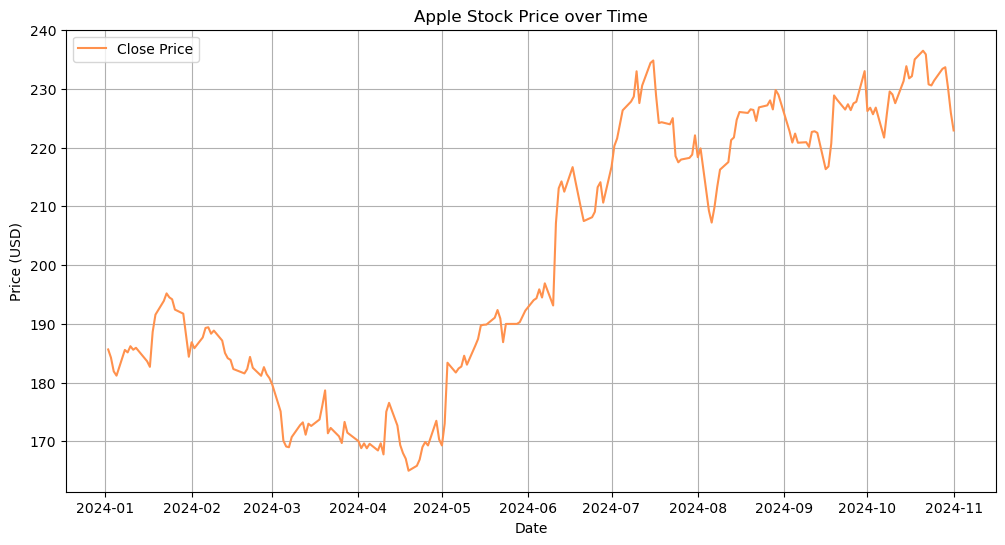

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color="#FF914D")
plt.title('Apple Stock Price over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decompositon

- Trend → Longterm direction
- Seasonality → Repeating over Seasons (or a period)
- Cyclic → Similar pattern but not seasonal (not fixed period)
    - Economic
    - Business
- Residual/Noise → Random fluctuations in data

**Types of Decomposition**

- Additive → yt = Tt + St + Rt
    - Trend increases but seasonal variation remains the same
- Multiplicative → yt = Tt * St * Rt
    - Seasonal variation also increases

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [5]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

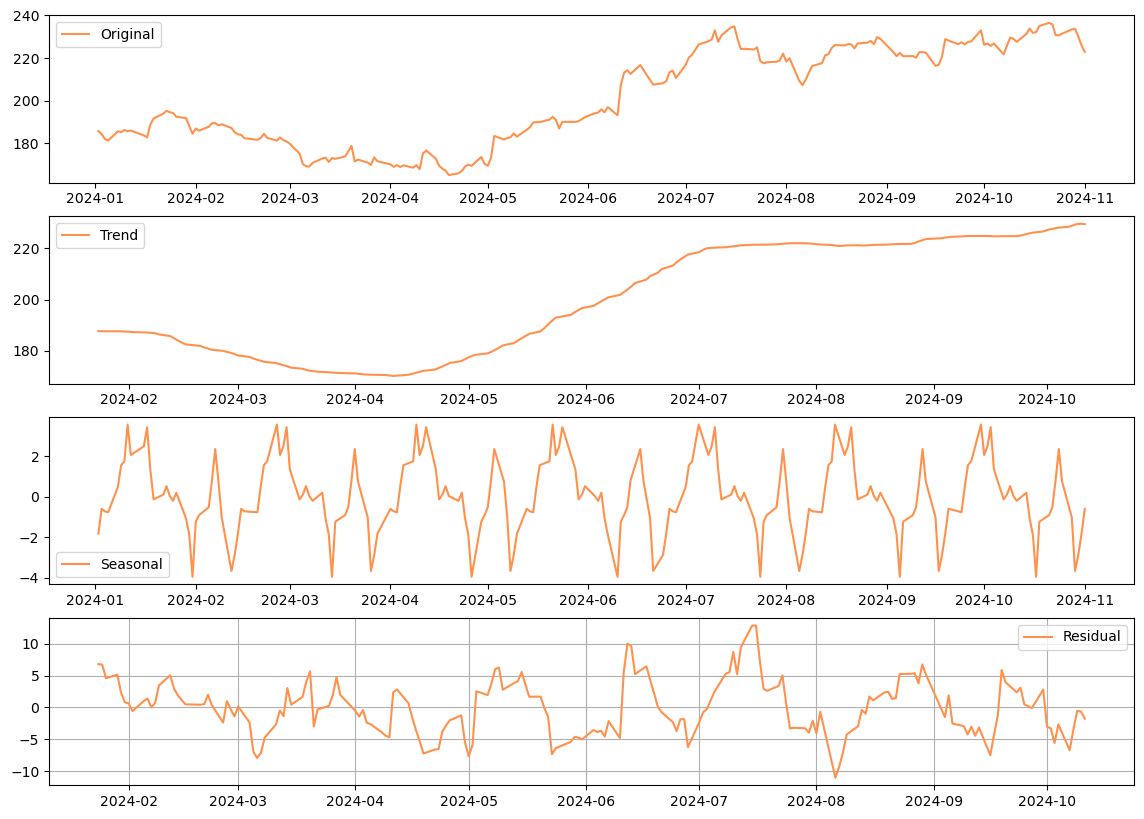

In [6]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color="#FF914D")
plt.legend()
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color="#FF914D")
plt.legend()
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color="#FF914D")
plt.legend()
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color="#FF914D")
plt.legend()
plt.grid(True)
plt.show()

# STL Decomposition using LOESS method

- LOESS → Locally Estimated Scatterplot Smoothening Method
    - season - The length of the seasonal smoother. Must be odd.
    - trend - The length of the trend smoother, usually around 150% of season. Must be odd and larger than season.
    - low_pass - The length of the low-pass estimation window, usually the smallest odd number larger than the periodicity of the data.
- Used Linear Regression to Smooth out the data
- Handle Outlier
- Cannot handle **Multiplicative** Decomposition Model

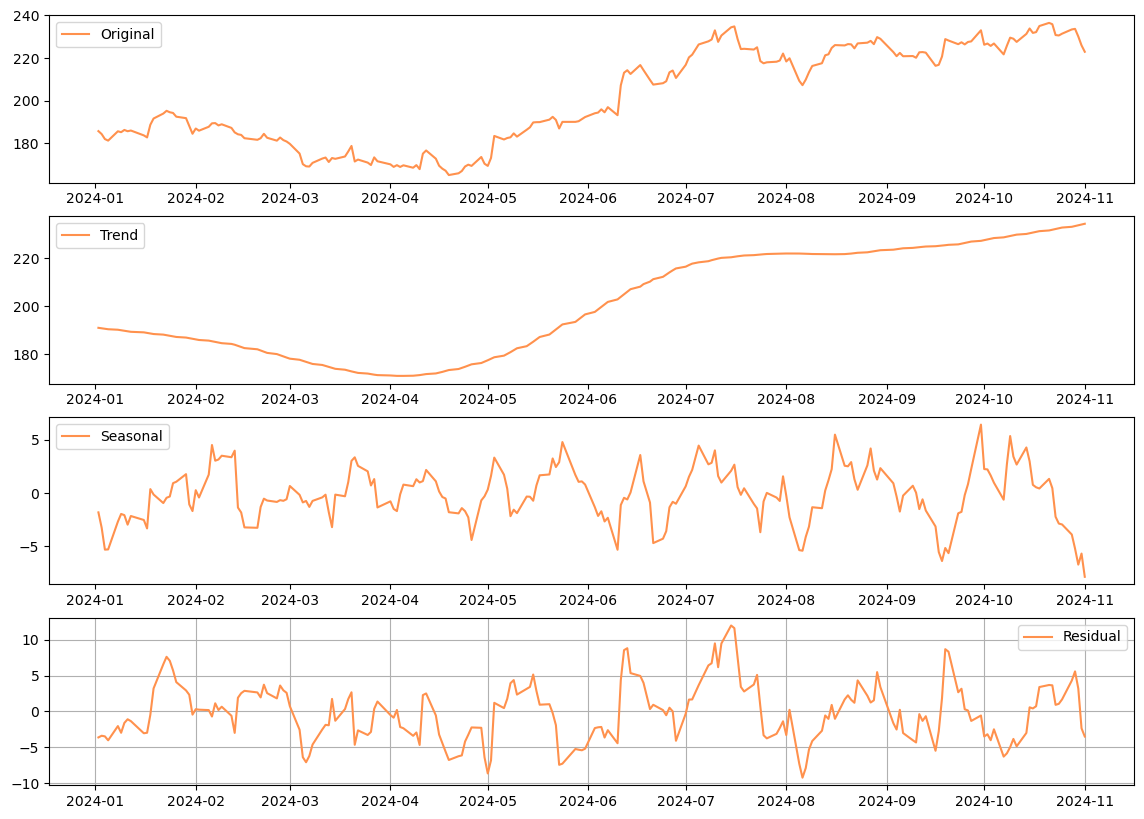

In [7]:
from statsmodels.tsa.seasonal import STL

stl = STL(stock_data['Close'], period=30)
result = stl.fit()

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color="#FF914D")
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Trend', color="#FF914D")
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color="#FF914D")
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residual', color="#FF914D")
plt.legend()
plt.grid(True)
plt.show()

# Stationarity test

- When mean, variance, and autocorrelation remain constant over time

1. Why do we need Stationary data?
    - We do this to make statistical properties of data similar throughout time for better forecasting
    - Forecasting Models require stationary data
2. Types of Stationarity
    1. Weak
        1. Constant Mean, Variance, and Autocorrelation
        2. Joint distribution can change
    2. Strict
        1. Exhibits the properties of Weak Stationarity
        2. Joint distribution remains unchanged when shifted along any period
3. Use cases
    1. For different forecasting Models and short periods of data → Weak Stationary
    2. Modelling an entire distribution of data → Strict Stationary


# Testing for Stationarity

1. To test Weak Stationarity
    1. ADF → Augmented Dickey-Fuller (ADF) Test
    2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
    
    1.1 ADF Test
    - We check if there is a unit root present in the data
    - Unit Root - Non-stationary trend
    - Prove Hypothesis testing
        - Ho: data has Unit root (non-stationary)
        - ha: data does not have a unit root (stationary)
    - Decision criteria: calculate p-value against significant value
    - ADF statistic < critical value, reject the NULL hypothesis
    
    1.2 KPSS Test
    
    - Fits a constant mean model on the data
    - measures the variance of the cumulative sum of residuals
    - Decision Criteria: calculate the p-value
        - Ho: stationary
        - Ha: non-stationary
    
    ***Note: Hypotheses are opposite of each other***
    
2. To check Strict Stationarity
    
    1.1 KS Test
    
    - Should be a Weak Stationary
    - Compare the cumulative distribution functions (Empirical) of two samples
    - Decision criteria: if p-value > significant value, the no difference in distribution → Data is S**trict stationary**

In [8]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_data['Close'])
print('ADF Test Results')
print(f"ADF Statistic: {round(adf_test[0], 3)}")
print(f"p-value: {round(adf_test[1], 3)}")
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f"   {key}: {round(value, 3)}")

ADF Test Results
ADF Statistic: -0.828
p-value: 0.811
Critical Values:
   1%: -3.462
   5%: -2.875
   10%: -2.574


In [9]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(stock_data['Close'], regression='ct')

print('KPSS Test Results')
print(f"KPSS Statistic: {round(kpss_test[0], 3)}")
print(f"p-value: {round(kpss_test[1], 3)}")
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f"   {key}: {round(value, 3)}")

KPSS Test Results
KPSS Statistic: 0.271
p-value: 0.01
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


C:\Users\Sahil\AppData\Local\Temp\ipykernel_36924\4079643961.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct')


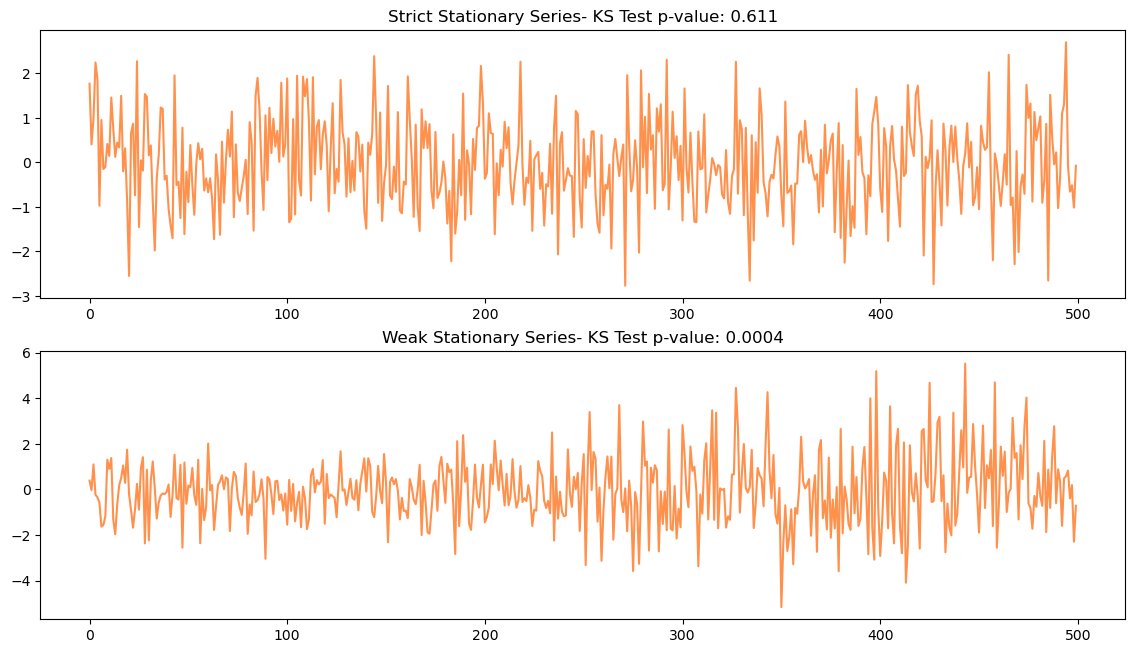

Strict Stationary Series - KS Test Statistic: 0.068, p-value: 0.611
Weak Stationary Series - KS Test Statistic: 0.184, p-value: 0.0004


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


np.random.seed(0)
n = 500
strict_stationary_series = np.random.normal(0, 1, n)

non_strict_stationary_series = np.concatenate([np.random.normal(0, 1, n//2), np.random.normal(0, 2, n//2)])

def ks_test_stationary(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value


ks_stat_strict, ks_pvalue_strict = ks_test_stationary(strict_stationary_series)

ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationary(non_strict_stationary_series)

plt.figure(figsize=(14, 16))
plt.subplot(411)
plt.plot(strict_stationary_series, label='Original', color="#FF914D")
plt.title(f'Strict Stationary Series- KS Test p-value: {round(ks_pvalue_strict, 3)}')
plt.subplot(412)
plt.plot(non_strict_stationary_series, label='Trend', color="#FF914D")
plt.title(f'Weak Stationary Series- KS Test p-value: {round(ks_pvalue_non_strict, 4)}')
plt.show()

print(f'Strict Stationary Series - KS Test Statistic: {ks_stat_strict}, p-value: {round(ks_pvalue_strict, 3)}')
print(f'Weak Stationary Series - KS Test Statistic: {ks_stat_non_strict}, p-value: {round(ks_pvalue_non_strict, 4)}')

# Making a time series Stationary

- Differencing
    - Yt = current value
    - Yt-1 = past observed value
    - first and second order differencing
- Transformation
    - Stabilizes the variance of time series data
    - Logarithmic: logs
    - Power: Root
    - Box-Cox: Combination of Logarithmic and Power
- Detrending
    - Linear detrending
    - Moving Average
- Seasonality Adjustment: removing seasonal componenet
    - STL

In [11]:
# Performing ADF and KPSS test

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic: ", result[0])
    print("p-value: ", result[1])
    for key, value in result[4].items():
        print("Critical Values (%s): %.3f" % (key, value))


def kpss_test(series):
    result = kpss(series, regression='c')
    print("KPSS Statistic: ", reuslt[0])
    print("p-value: ", result[1])
    for key, value in result[3].items():
        print("Critical Values (%s): %.3f" % (key, value))

In [12]:
prices = stock_data['Close']

In [13]:
adf_test(prices)

ADF Statistic:  -0.8279764733923943
p-value:  0.8107657618530091
Critical Values (1%): -3.462
Critical Values (5%): -2.875
Critical Values (10%): -2.574


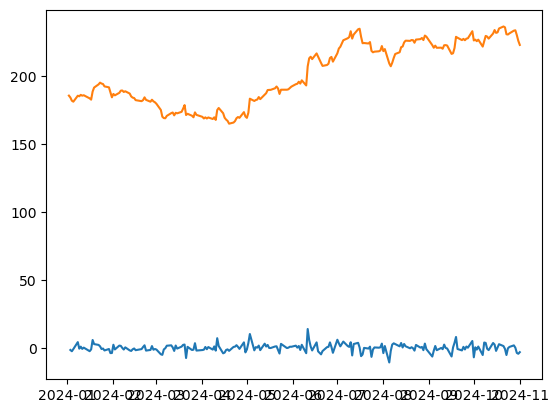

In [14]:
plt.plot(prices.diff())
plt.plot(prices)

In [15]:
# Check stationarity

adf_test(prices.diff().dropna())

ADF Statistic:  -13.526239736002893
p-value:  2.6751389531402317e-25
Critical Values (1%): -3.462
Critical Values (5%): -2.875
Critical Values (10%): -2.574


**Data is Statioanry**

In [16]:
# Transformations
import numpy as np
from scipy import stats

# Log transforamtions
prices_log = np.log(prices)

# Square root transformation
prices_root = np.sqrt(prices)

# Box-Cox transformations
# Note: Only positives values required
prices_boxcox, lam = stats.boxcox(prices[prices > 0])

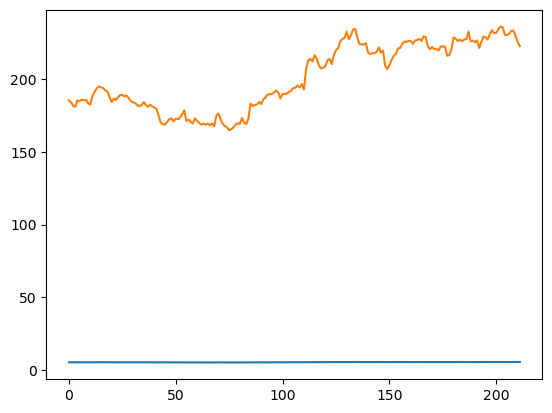

In [17]:
plt.plot(np.arange(len(prices)), prices_log)
plt.plot(np.arange(len(prices)), prices)

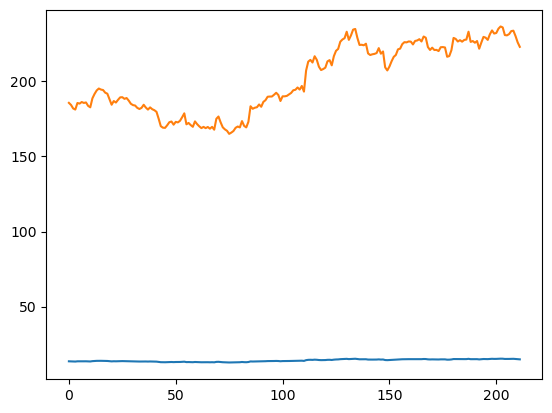

In [18]:
plt.plot(np.arange(len(prices)), prices_root)
plt.plot(np.arange(len(prices)), prices)

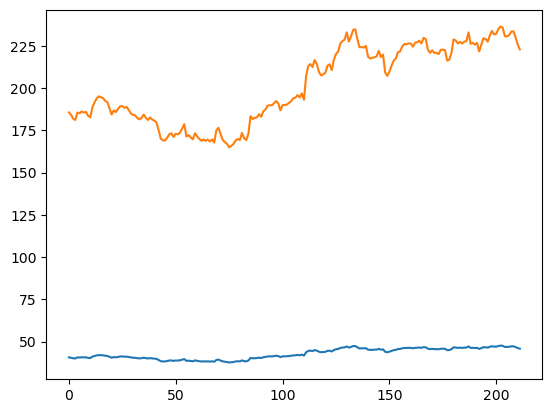

In [19]:
plt.plot(np.arange(len(prices)), prices_boxcox)
plt.plot(np.arange(len(prices)), prices)

In [20]:
# Check stationarity with transformations

adf_test(prices_log)
adf_test(prices_root)
adf_test(prices_boxcox)

ADF Statistic:  -0.8057299883990596
p-value:  0.8174331296060474
Critical Values (1%): -3.462
Critical Values (5%): -2.875
Critical Values (10%): -2.574
ADF Statistic:  -0.8146987103294028
p-value:  0.8147662577255299
Critical Values (1%): -3.462
Critical Values (5%): -2.875
Critical Values (10%): -2.574
ADF Statistic:  -0.8176888007975774
p-value:  0.8138708176139868
Critical Values (1%): -3.462
Critical Values (5%): -2.875
Critical Values (10%): -2.574


**Data is not Stationary**

In [21]:
# Using De-Trending
from scipy import signal

# using a linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

In [22]:
# Check for Stationarity
adf_test(prices_detrended)

ADF Statistic:  -1.9554600187910225
p-value:  0.3064370779468506
Critical Values (1%): -3.462
Critical Values (5%): -2.875
Critical Values (10%): -2.574


**Not Stationary**

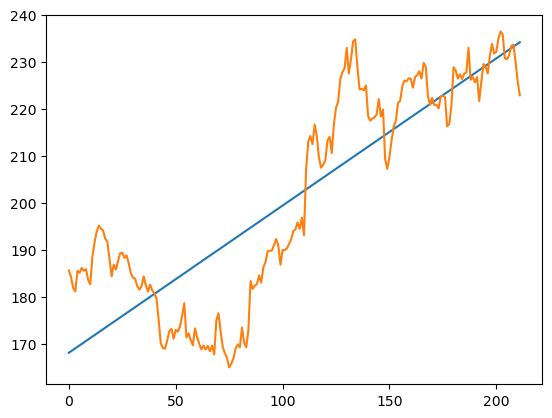

In [23]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)

In [24]:
# Moving Averages - De Trending
window = 12
prices_ma = prices.rolling(window = window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

In [25]:
adf_test(prices_detrended)

ADF Statistic:  -4.091682912989426
p-value:  0.0009996413933646424
Critical Values (1%): -3.464
Critical Values (5%): -2.876
Critical Values (10%): -2.575


Text(0.5, 1.0, 'Moving Avg vs Prices')

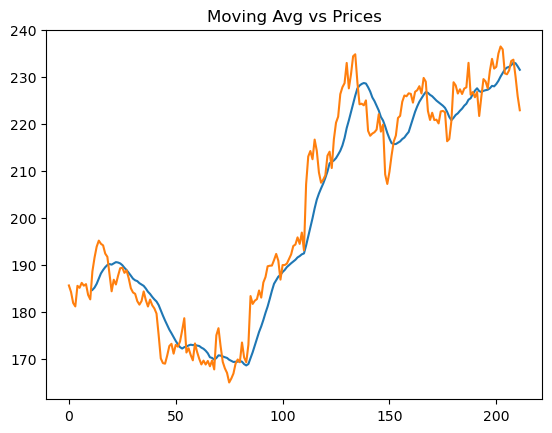

In [26]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.title("Moving Avg vs Prices")

In [27]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(prices, model='additive', period=30)
prices_adjusted = prices / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [28]:
adf_test(prices_adjusted)

ADF Statistic:  -8.340256368900128
p-value:  3.190333863965625e-13
Critical Values (1%): -3.462
Critical Values (5%): -2.876
Critical Values (10%): -2.574


Text(0.5, 1.0, 'Decomposed prices vs Prices')

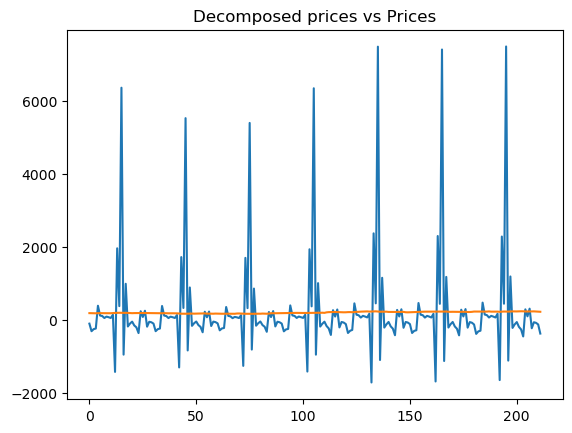

In [29]:
plt.plot(np.arange(len(prices)), prices_adjusted)
plt.plot(np.arange(len(prices)), prices)
plt.title("Decomposed prices vs Prices")

# White Noise and Random Walk

**White Noise**
- No Pattern, Trend, or Seasonality
- Same mean and constant variance
- No Auto Correlation
- Completely Random

**Random Walk**
- Cumulative Pattern: New value dependent on previous term
    - yt = yt - Et
- Non-stationary
- Variable mean and variance
- First difference is stationary

**Identifying White Noise and random Walk**
- Visually
- ACF and PACF plot
- Ljung box test: to check auto correlation

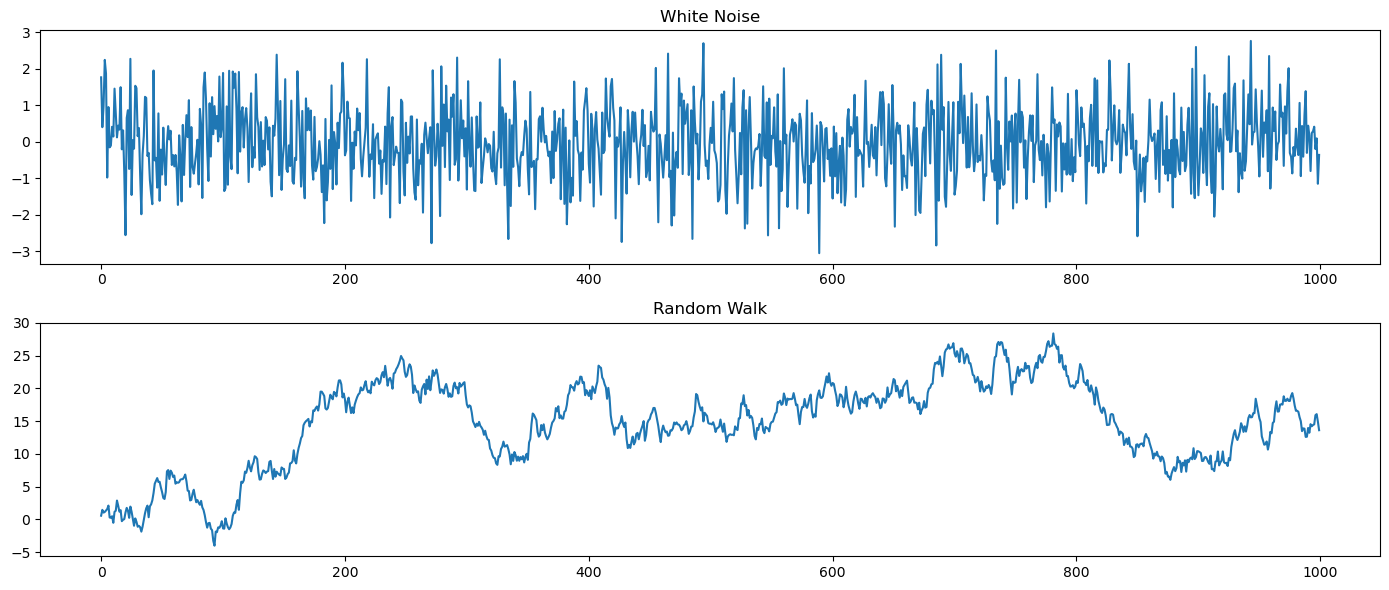

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

np.random.seed(0)
n = 1000

# White Noise
white_noise = np.random.normal(0, 1, n)

# Random Walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise)
plt.title("White Noise")

plt.subplot(2, 1, 2)
plt.plot(random_walk)
plt.title("Random Walk")

plt.tight_layout()
plt.show()

In [31]:
print("Ljung Box test for White Noise")
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)


print("Ljung Box test for Random Walk")
lb_test_random_walk = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)

Ljung Box test for White Noise
      lb_stat  lb_pvalue
10  14.025574   0.171828
Ljung Box test for Random Walk
        lb_stat  lb_pvalue
10  8828.660312        0.0


# Time Series Forecasting Models

**Univariate Models**
- AR: Auto Regressive
- MA: Moving Average
- ARMA: Auto Regressive Moving Average
- ARIMA: Auto Regressive Integrated Moving Average
- SARIMA: Seasonal Auto Regressive Integrated Moving Average


**1. Auto Regressive (AR) Model**
- Uses past values of self series to predict future values
- Always works on order of AR Models, (p) which means number of lagged observations
- AR(p): yt = C + phi*yt-1 + phi*yt-2 + ______ + phi*yt-p + Et
    - Et = White noise
    - C = constant term
    - phi = model parameter
    - y = observation
 
 
**2. Moving Average (MA) Model**
- Uses past error terms (residuals)
- order of moving average model (q), number of lagged error terms
- Not the smoothening technique
- same formula as above


**3. Auto Regressive Moving Average (ARMA) Model**
- Combines both AR And MA models
- captures both temporal dependencies and error terms
- Order (p, q)


**4. Auto Regressive Integrated Moving Average (ARIMA) Model**
- Integrated means differencing
- Never over difference
- Order (p, d, q)


**5. Seasonal Auto Regressive Integrated Moving Average (SARIMA) Model**
- If seasonality is present in your data
- Order (p, d, q)(P, D, Q)m


**Multivariate Models**
- Uses multiple time series and thier dependencies on each other to forecast values
- VAR: Vector Auto Regressive
- VMA: Vector Moving Average
- VARMA: Vector Auto Regressive Moving Average
- VARIMA: Vector Auto Regressive Integrated Moving Average

**Note: Granger Causality Test**
- Checks if X causes y
- One time series can predict another time series

# AR Model

In [32]:
stock_data = yf.download('AAPL', start = '2024-01-01')
apple_price_stationary = stock_data['Close'].diff().dropna()

train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


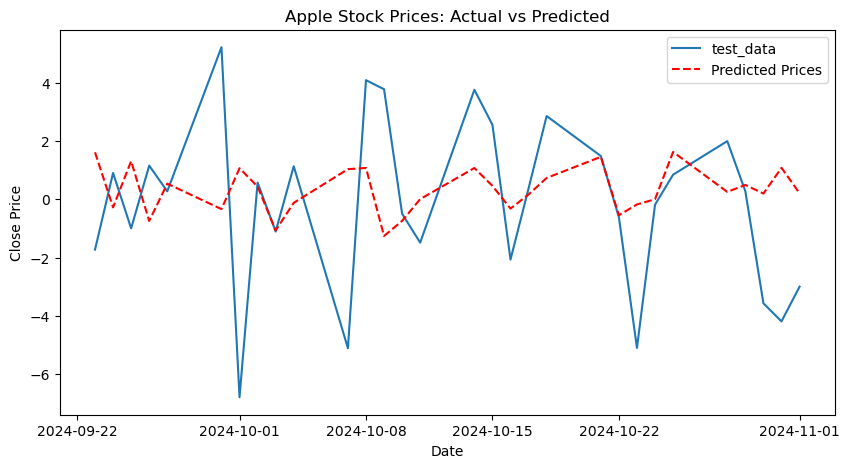

RMSE:  3.1


In [33]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='test_data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Calculating RMSE value
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 1)
print('RMSE: ', rmse)

# MA Model

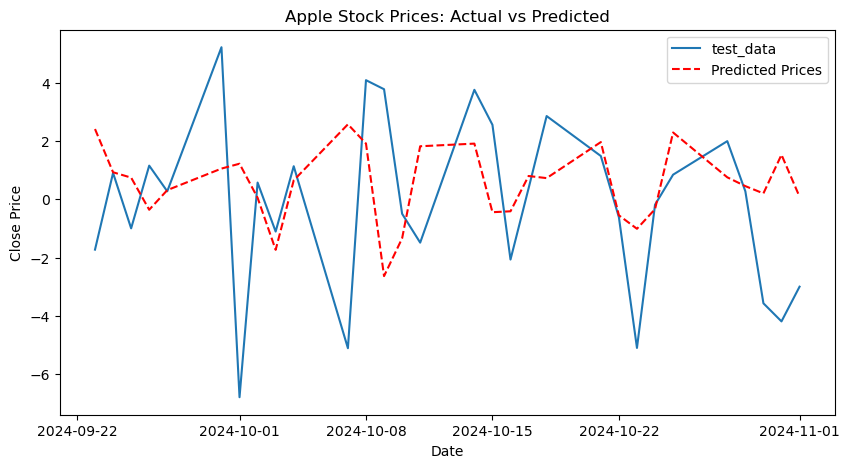

RMSE:  3.3


In [34]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(0, 0, 30))
model_fit = model.fit()

predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='test_data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Calculating RMSE value
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 1)
print('RMSE: ', rmse)

# ARMA Model

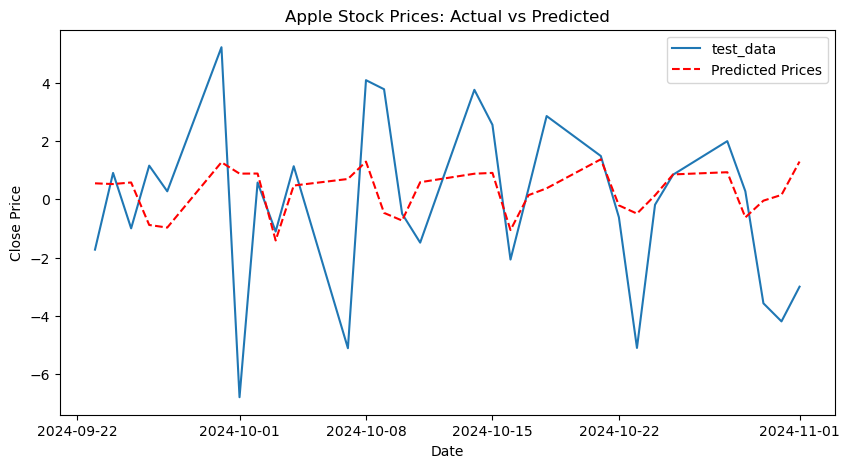

RMSE:  2.8


In [35]:
model = ARIMA(train_data, order=(7, 0, 7))
model_fit = model.fit()

predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='test_data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Calculating RMSE value
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 1)
print('RMSE: ', rmse)

# ARIMA Model

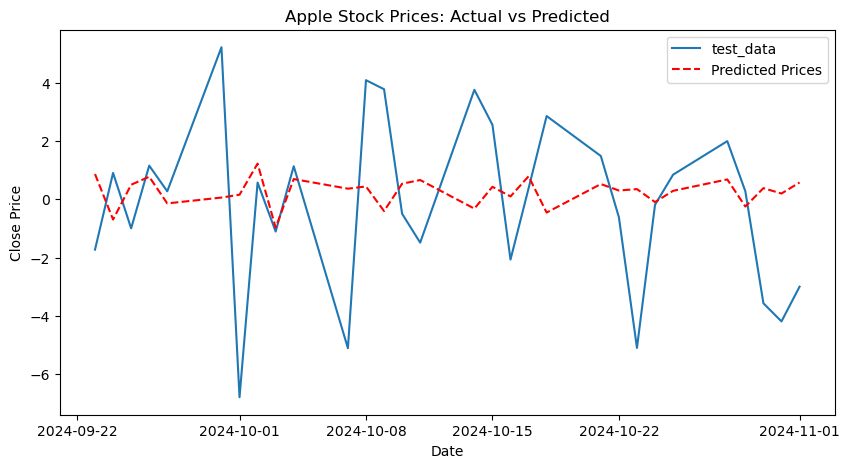

RMSE:  3.0


In [36]:
model = ARIMA(train_data, order=(7, 1, 7))
model_fit = model.fit()

predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='test_data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Calculating RMSE value
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 1)
print('RMSE: ', rmse)

# SARIMA Model

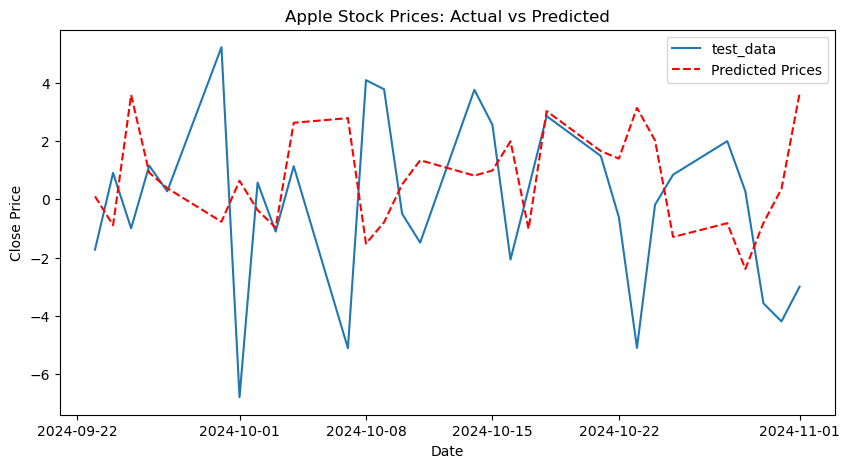

RMSE:  3.8


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 7, 1, 7
P, D, Q, m = 1, 1, 1, 45

model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='test_data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Calculating RMSE value
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 1)
print('RMSE: ', rmse)

# Smoothening Methods
<b>Moving Average</b>
1. Importance:
    - Noise reduction
    - Good for forecasting high fluctuated time series data
    - Trend Identification
2. Moving Average
    - Window Size
    - Calculate average based on window size
    - Simple Moving Average
    - Weighted Moving Average
3. Exponential Moving Average
    - alpha - Smoothing factor (2/n+1)

<b>Exponential Smoothing </b>
1. Simple Exponential (SES)
2. Double Exponential (DES)
3. Triple Exponential TES)

## Moving Average

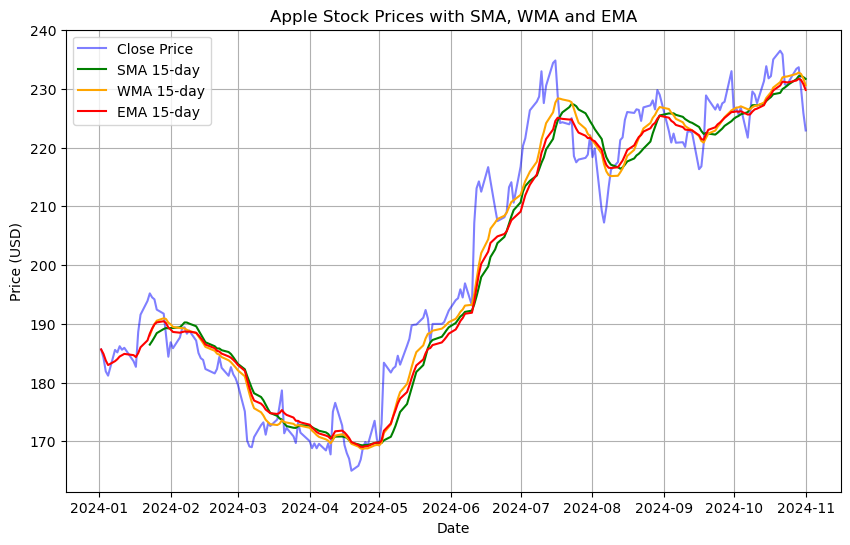

In [38]:
window_size = 15
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

# Calculate Weighted Moving Average (WMA)
weights = np.arange(1, window_size + 1)

stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

# Calculate Exponential Moving Average (EMA)
stock_data['EMA'] = stock_data['Close'].ewm(span = window_size).mean()

# Plotting

plt.figure(figsize=(10, 6))

plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label=f'SMA {window_size}-day', color='green')
plt.plot(stock_data['WMA'], label=f'WMA {window_size}-day', color='orange')
plt.plot(stock_data['EMA'], label=f'EMA {window_size}-day', color='red')

plt.title('Apple Stock Prices with SMA, WMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

## Exponential Smoothing

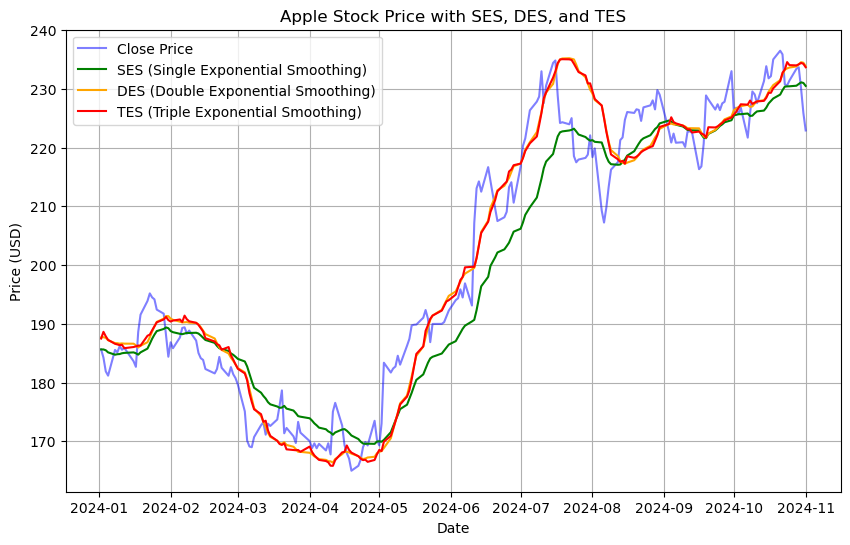

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
close_prices = stock_data['Close']
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.1)
stock_data['SES'] = ses_model.fittedvalues
# Double Exponential Smoothing (DES) - Holt's linear trend model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.1)
stock_data['DES'] = des_model.fittedvalues
# Triple Exponential Smoothing (TES) - Holt-Winters method
tes_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.1)
stock_data['TES'] = tes_model.fittedvalues
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SES'], label='SES (Single Exponential Smoothing)', color='green')
plt.plot(stock_data['DES'], label='DES (Double Exponential Smoothing)', color='orange')
plt.plot(stock_data['TES'], label='TES (Triple Exponential Smoothing)', color='red')
plt.title('Apple Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Auto Correlation (ACF)  and Partial AutoCorrelation (PACF) Plot
### What is Autocorrelation?
Autocorrelation, also known as serial correlation, measures the relationship between a time series and a lagged version of itself over successive time intervals. Simply put, it tells you how similar the data points are to each other at different time lags.

Example: Imagine you are tracking the temperature of a city every day. If today’s temperature is similar to yesterday’s, and yesterday’s temperature is similar to the day before, we say that the temperature data is autocorrelated.

### The Autocorrelation Function (ACF)
The ACF plots the correlation of the time series with itself at different lags. This helps in identifying patterns such as seasonality, trends, and the persistence of values over time.

- Lag 1: Correlation between observations at time t and t−1
- Lag 2: Correlation between observations at time t and t−2
- And so on…

### Interpreting ACF Plots
When you look at an ACF plot, you’ll see bars at each lag. The height of the bar represents the correlation coefficient at that lag.

- Significant Lag: If a bar extends beyond the significance bounds, it indicates significant autocorrelation at that lag.
- Gradual Decline: A gradual decline in bar heights suggests a long-term dependency in the data.
- Seasonal Patterns: Regular spikes at certain lags suggest seasonality in the data.

### Partial Autocorrelation
Partial autocorrelation measures the correlation between observations at two time points, accounting for the values of the observations at all shorter lags. This helps isolate the direct relationship between observations at different lags, removing the influence of intermediary observations.

### The Partial Autocorrelation Function (PACF)
The PACF plot shows the partial correlation of the time series with itself at different lags.

### Interpreting PACF Plots
The PACF plot helps determine the order of an autoregressive model (AR model).

- Significant Lag: A significant spike at a particular lag suggests the inclusion of that lag in the AR model.
- Cut-off Point: The lag at which the PACF plot cuts off helps determine the maximum lag to include in the AR model.

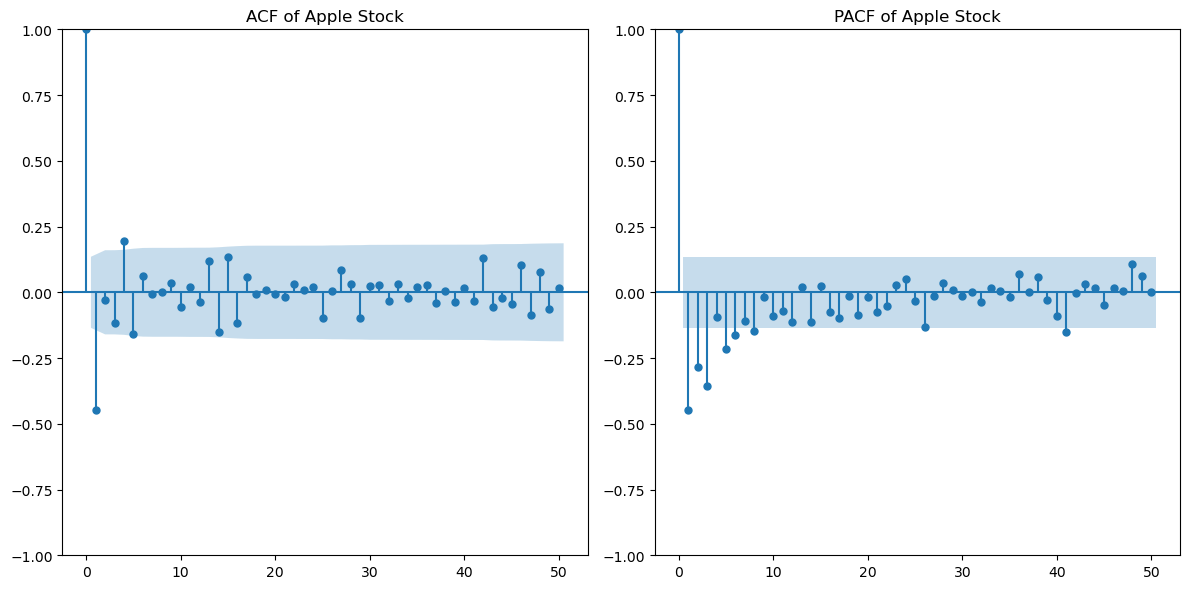

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(stock_data['Close'].diff().diff().dropna (), ax=plt.gca(), lags=50)
plt.title('ACF of Apple Stock')
# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(stock_data['Close'].diff().diff().dropna (), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF of Apple Stock')
plt.tight_layout()
plt.show()

# Model Evaluation Metrics

In time series forecasting, choosing the right evaluation metrics is crucial for assessing model performance. These metrics help quantify the accuracy of predictions and guide model improvements. Below are some common evaluation metrics used in time series analysis:

<b>1. Mean Absolute Error (MAE)</b>
- Definition: MAE measures the average of the absolute differences between the predicted values and actual values.
- Advantages:
    - Easy to interpret (measures the average prediction error in the same unit as the data).
    - Insensitive to large errors, as it does not square the residuals.
- Disadvantages: Does not penalize large errors as heavily as other metrics like RMSE.

<b>2. Mean Squared Error (MSE)</b>
- Definition: MSE measures the average of the squared differences between actual and predicted values. It penalizes larger errors more than MAE.
- Advantages: Penalizes large errors more heavily, making it useful when large errors are particularly undesirable.
- Disadvantages: Sensitive to outliers because errors are squared.

<b>3. Root Mean Squared Error (RMSE)</b>
- Definition: RMSE is the square root of MSE, and it gives a more interpretable metric since it's in the same unit as the data.
- Advantages: 
    - Easier to interpret than MSE (since it's in the same units as the data).
    - More sensitive to outliers than MAE.
- Disadvantages: Overly penalizes larger errors because of squaring, which can be problematic for noisy data.

<b>4. Mean Absolute Percentage Error (MAPE)</b>
- Definition: MAPE measures the percentage error between actual and predicted values, making it scale-independent and easy to compare across datasets.
- Advantages:
    - Easy to interpret as a percentage.
    - Scale-independent, so you can compare performance across different datasets.
- Disadvantages:
    - MAPE can be misleading when actual values are close to zero, as it can lead to very large errors.
    - Tends to overestimate error when small values are present.

<b>5. R-squared (Coefficient of Determination)</b>
- Definition: R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variable(s). For time series, it gives a sense of how well the model's predictions match the actual data.
- Advantages: A good general-purpose metric for comparing models.
- Disadvantages: Can be misleading for time series, especially if the model is overfitting or the data is highly autocorrelated.

<b>6. Akaike Information Criterion (AIC)</b>
- Definition: The AIC estimates the relative quality of a statistical model for a given dataset. It provides a trade-off between goodness of fit and the complexity of the model.
- How it works:
    - The first term (-2 log likelihood) rewards models that fit the data well.
    - The second term (2k) penalizes models with more parameters, discouraging overfitting.
- Interpretation: A lower AIC value indicates a better model. When comparing multiple models, the one with the smallest AIC is preferred.
- Advantages:
    - Helps balance the trade-off between model complexity and fit.
    - Can be used for both nested and non-nested models.
    - Useful for model selection in time series, especially when using models like ARIMA.
- Disadvantages:
    - Sensitive to the number of observations (sample size). With small sample sizes, AIC can favor more complex models.
    - Doesn’t provide an absolute measure of model quality; it’s useful only for relative comparisons between models.

<b>7. Bayesian Information Criterion (BIC)</b>
- Definition: BIC is similar to AIC but imposes a harsher penalty for model complexity, particularly when the dataset is large. This can help avoid overfitting even more strictly than AIC.
- How it works:
    - Like AIC, the first term rewards models that fit the data well.
    - The second term (𝑘log(𝑛)) penalizes models based on the number of parameters, but the penalty grows with the size of the dataset (log(𝑛)), leading to a stricter penalization for complex models in larger datasets.
- Interpretation: A lower BIC value indicates a better model. Similar to AIC, BIC is used for comparing models, and the model with the lowest BIC is considered the best.
- Advantages:
    - Stronger penalty for model complexity than AIC, which can result in simpler models, particularly when working with large datasets.
    - Tends to favor parsimonious models (models with fewer parameters).
- Disadvantages:
    - In smaller datasets, BIC can sometimes favor overly simple models.
    - Like AIC, BIC is also used for relative comparison and does not provide an absolute measure of model performance.

In [41]:
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]
# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()
# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error # 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions) 
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions) 
print (f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print (f'Root Mean Squared Error (RMSE): {rmse}')

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100 
print (f'Mean Absolute Percentage Error (MAPE): {mape}%')

#aic and bic
aic = model_fit.aic
bic = model_fit.bic
print(f'Akaike Information Criterion (AIC): {aic}') 
print(f'Bayesian Information Criterion (BIC): {bic}')

Mean Absolute Error (MAE): 2.2920648374716994
Mean Squared Error (MSE): 9.63800069782292
Root Mean Squared Error (RMSE): 3.104512956620236
Mean Absolute Percentage Error (MAPE): 94.33518481517065%
Akaike Information Criterion (AIC): 817.3981789136116
Bayesian Information Criterion (BIC): 913.9511336916892


# Data Preprocessing
    1. Handling Missing Values
        - Date with no value
        - Date is missing
        - How to handle:
            - Imputation: Mean, Mode, Median, forward, backward
            - Interpolation: Linear, Spline, polynomial
            - Using Machine Learning: Predictive modelling
    2. Making data stationary
    3. Handling Outliers
        - Transformation
        - Smoothing
    4. Resampling
        - Downsampling: decreasing freq
        - Upsampling: increasing freq